<a href="https://colab.research.google.com/github/SandipKankal/Data_Science/blob/main/NLP_Script_MobileReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Necessary Libraries:

In [1]:
import pandas as pd
import re
import nltk
import warnings
warnings.filterwarnings('ignore')

## Data Collection:

In [3]:
data = pd.read_excel('Scraping_review.xlsx')
data

,Unnamed: 0,reviews
0,0,\nI ordered this phone 1 year ago... Overll al...
1,1,\nPros:1. Good battery life.2. Good design.3. ...
2,2,\nBahut accha phone hai muje bahut accha laga😊...
3,3,\nNice\n
4,4,\nGreat\n
...,...,...
16039,16039,\nदाम के बराबर माल अछ्छा है\n
16040,16040,\nNice battery 🔋\n
16041,16041,\nCamera is not good at all..\n
16042,16042,\nPoor sound quality and disappointed with the...


In [4]:
data.to_csv('mobile_review.csv',index =False)

In [5]:
df = pd.read_csv('mobile_review.csv')
df

,Unnamed: 0,reviews
0,0,\nI ordered this phone 1 year ago... Overll al...
1,1,\nPros:1. Good battery life.2. Good design.3. ...
2,2,\nBahut accha phone hai muje bahut accha laga😊...
3,3,\nNice\n
4,4,\nGreat\n
...,...,...
16039,16039,\nदाम के बराबर माल अछ्छा है\n
16040,16040,\nNice battery 🔋\n
16041,16041,\nCamera is not good at all..\n
16042,16042,\nPoor sound quality and disappointed with the...


## EDA

In [6]:
df2 = df.drop(['Unnamed: 0'],axis=1)
df2

,reviews
0,\nI ordered this phone 1 year ago... Overll al...
1,\nPros:1. Good battery life.2. Good design.3. ...
2,\nBahut accha phone hai muje bahut accha laga😊...
3,\nNice\n
4,\nGreat\n
...,...
16039,\nदाम के बराबर माल अछ्छा है\n
16040,\nNice battery 🔋\n
16041,\nCamera is not good at all..\n
16042,\nPoor sound quality and disappointed with the...


In [7]:
df2.shape

(16044, 1)

In [8]:
df2.isna().sum() #Null entries found

reviews    400
dtype: int64

In [9]:
df3 = df2.dropna()
df3

,reviews
0,\nI ordered this phone 1 year ago... Overll al...
1,\nPros:1. Good battery life.2. Good design.3. ...
2,\nBahut accha phone hai muje bahut accha laga😊...
3,\nNice\n
4,\nGreat\n
...,...
16039,\nदाम के बराबर माल अछ्छा है\n
16040,\nNice battery 🔋\n
16041,\nCamera is not good at all..\n
16042,\nPoor sound quality and disappointed with the...


In [10]:
df3 = df3.reset_index()
df3

,index,reviews
0,0,\nI ordered this phone 1 year ago... Overll al...
1,1,\nPros:1. Good battery life.2. Good design.3. ...
2,2,\nBahut accha phone hai muje bahut accha laga😊...
3,3,\nNice\n
4,4,\nGreat\n
...,...,...
15639,16039,\nदाम के बराबर माल अछ्छा है\n
15640,16040,\nNice battery 🔋\n
15641,16041,\nCamera is not good at all..\n
15642,16042,\nPoor sound quality and disappointed with the...


In [13]:
df3 = df3.drop(['index'],axis=1)
df3

,reviews
0,\nI ordered this phone 1 year ago... Overll al...
1,\nPros:1. Good battery life.2. Good design.3. ...
2,\nBahut accha phone hai muje bahut accha laga😊...
3,\nNice\n
4,\nGreat\n
...,...
15639,\nदाम के बराबर माल अछ्छा है\n
15640,\nNice battery 🔋\n
15641,\nCamera is not good at all..\n
15642,\nPoor sound quality and disappointed with the...


In [14]:
df3['reviews'] = df3['reviews'].str.replace('\n','')#removing unwanted leading and trailing '\n'.
df3

,reviews
0,I ordered this phone 1 year ago... Overll all ...
1,Pros:1. Good battery life.2. Good design.3. Am...
2,Bahut accha phone hai muje bahut accha laga😊😊😊😊
3,Nice
4,Great
...,...
15639,दाम के बराबर माल अछ्छा है
15640,Nice battery 🔋
15641,Camera is not good at all..
15642,Poor sound quality and disappointed with the b...


In [11]:
df3.shape

(15644, 2)

In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15644 entries, 0 to 15643
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  15644 non-null  object
dtypes: object(1)
memory usage: 122.3+ KB


In [12]:
df3.describe()

,index
count,15644.000000
mean,8023.651176
std,4631.697708
min,0.000000
25%,4010.750000
50%,8021.500000
75%,12032.250000
max,16043.000000


In [13]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#processed_reviews = []
#for i in range(len(df3)):
#    review = re.sub('[^a-zA-Z0-9]',' ',df3['reviews'][i])
#    review = review.lower()
#    review = review.split()
#    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
#    review = ' '.join(review)
#    processed_reviews.append(review)

In [14]:
stopwords = stopwords.words('english')

In [15]:
def preprocessed_reviews(review):
    review = re.sub('[^a-zA-Z]',' ',review)
    review = review.lower()                              
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords]
    review = ' '.join(review)
    return review

In [16]:
df3['processed_reviews'] = df3['reviews'].apply(preprocessed_reviews)
df3.head()

,index,reviews,processed_reviews
0,0,\nI ordered this phone 1 year ago... Overll al...,order phone year ago overl averag phone budget...
1,1,\nPros:1. Good battery life.2. Good design.3. ...,pro good batteri life good design amol screen ...
2,2,\nBahut accha phone hai muje bahut accha laga😊...,bahut accha phone hai muje bahut accha laga
3,3,\nNice\n,nice
4,4,\nGreat\n,great


In [17]:
from textblob import TextBlob

In [18]:
df3['polarity'] = (round(df3['processed_reviews'].apply(lambda x:TextBlob(x).sentiment.polarity),3))
df3

,index,reviews,processed_reviews,polarity
0,0,\nI ordered this phone 1 year ago... Overll al...,order phone year ago overl averag phone budget...,0.250
1,1,\nPros:1. Good battery life.2. Good design.3. ...,pro good batteri life good design amol screen ...,0.675
2,2,\nBahut accha phone hai muje bahut accha laga😊...,bahut accha phone hai muje bahut accha laga,0.000
3,3,\nNice\n,nice,0.600
4,4,\nGreat\n,great,0.800
...,...,...,...,...
15639,16039,\nदाम के बराबर माल अछ्छा है\n,,0.000
15640,16040,\nNice battery 🔋\n,nice batteri,0.600
15641,16041,\nCamera is not good at all..\n,camera good,0.700
15642,16042,\nPoor sound quality and disappointed with the...,poor sound qualiti disappoint batteri life dis...,-0.133


In [19]:
df3.describe()   #polarity ranges from -1 to +1.

,index,polarity
count,15644.000000,15644.000000
mean,8023.651176,0.333978
std,4631.697708,0.373172
min,0.000000,-1.000000
25%,4010.750000,0.000000
50%,8021.500000,0.365000
75%,12032.250000,0.700000
max,16043.000000,1.000000


In [20]:
Pol = []
for i in df3.polarity:
    if i>0:
        Pol.append('Positive')
    elif i<0:
        Pol.append('Negative')
    else:
        Pol.append('Neutral')
df3['sentiments'] = Pol        

In [21]:
df3

,index,reviews,processed_reviews,polarity,sentiments
0,0,\nI ordered this phone 1 year ago... Overll al...,order phone year ago overl averag phone budget...,0.250,Positive
1,1,\nPros:1. Good battery life.2. Good design.3. ...,pro good batteri life good design amol screen ...,0.675,Positive
2,2,\nBahut accha phone hai muje bahut accha laga😊...,bahut accha phone hai muje bahut accha laga,0.000,Neutral
3,3,\nNice\n,nice,0.600,Positive
4,4,\nGreat\n,great,0.800,Positive
...,...,...,...,...,...
15639,16039,\nदाम के बराबर माल अछ्छा है\n,,0.000,Neutral
15640,16040,\nNice battery 🔋\n,nice batteri,0.600,Positive
15641,16041,\nCamera is not good at all..\n,camera good,0.700,Positive
15642,16042,\nPoor sound quality and disappointed with the...,poor sound qualiti disappoint batteri life dis...,-0.133,Negative


In [22]:
df3['sentiments'].value_counts()

Positive    10852
Neutral      3306
Negative     1486
Name: sentiments, dtype: int64

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

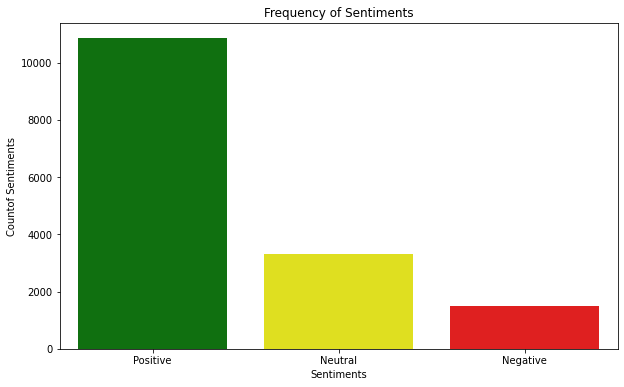

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(df3['sentiments'],palette={'Negative':'red','Positive':'green','Neutral' :'yellow'})
plt.xlabel('Sentiments')
plt.ylabel('Countof Sentiments')
plt.title('Frequency of Sentiments')
plt.show()

In [ ]:
#df2['word_count'] = df2['reviews'].str.split().apply(len)  other way

In [25]:
#Words count in the processed reviews.
df3['word_count'] = df3['processed_reviews'].apply(lambda x:len(x.split()))
df3

,index,reviews,processed_reviews,polarity,sentiments,word_count
0,0,\nI ordered this phone 1 year ago... Overll al...,order phone year ago overl averag phone budget...,0.250,Positive,21
1,1,\nPros:1. Good battery life.2. Good design.3. ...,pro good batteri life good design amol screen ...,0.675,Positive,25
2,2,\nBahut accha phone hai muje bahut accha laga😊...,bahut accha phone hai muje bahut accha laga,0.000,Neutral,8
3,3,\nNice\n,nice,0.600,Positive,1
4,4,\nGreat\n,great,0.800,Positive,1
...,...,...,...,...,...,...
15639,16039,\nदाम के बराबर माल अछ्छा है\n,,0.000,Neutral,0
15640,16040,\nNice battery 🔋\n,nice batteri,0.600,Positive,2
15641,16041,\nCamera is not good at all..\n,camera good,0.700,Positive,2
15642,16042,\nPoor sound quality and disappointed with the...,poor sound qualiti disappoint batteri life dis...,-0.133,Negative,22


In [26]:
from wordcloud import WordCloud

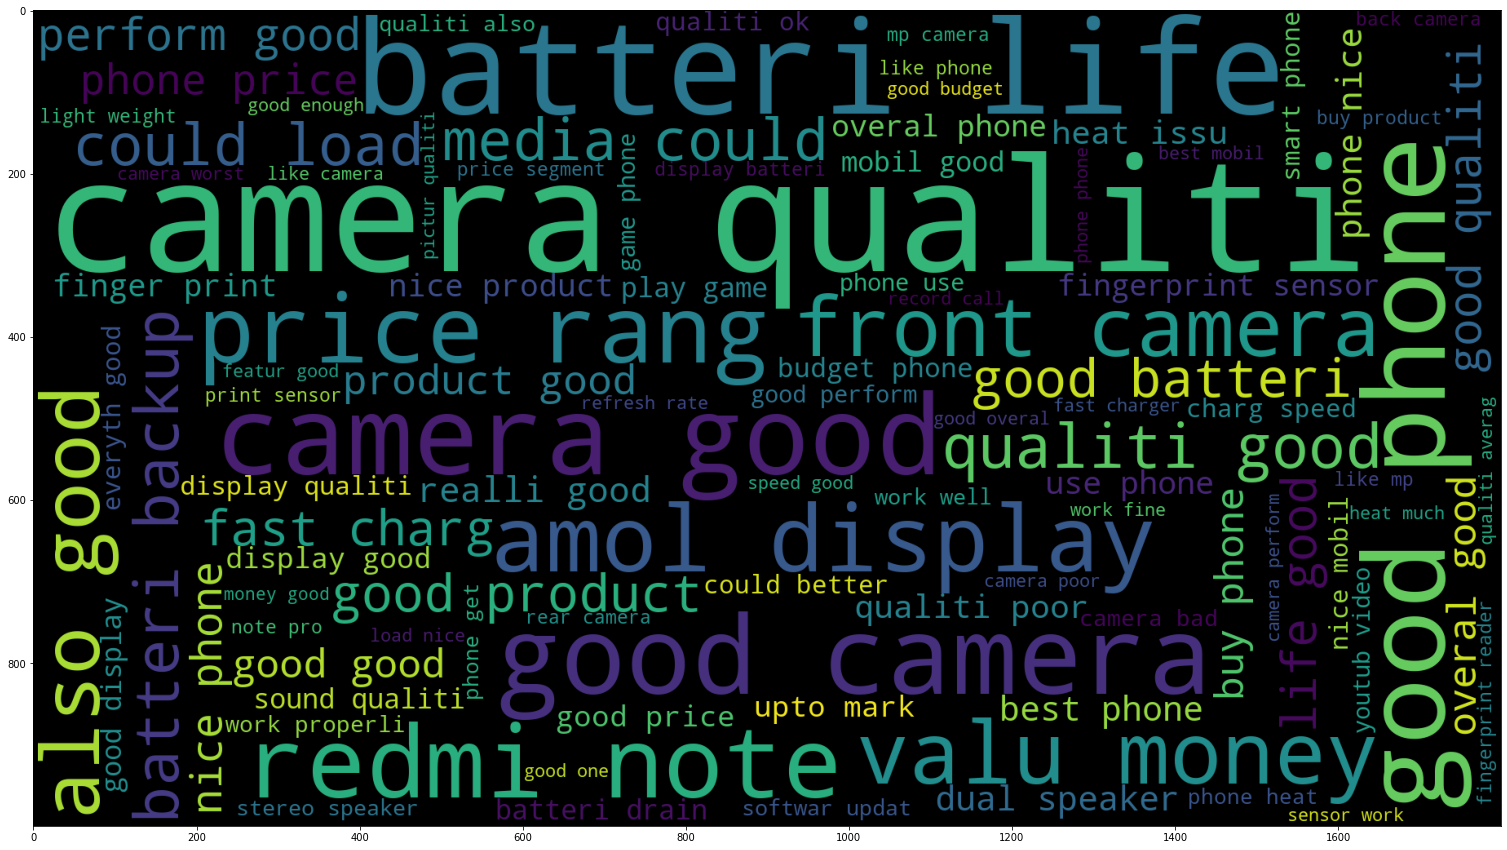

In [27]:
text2= ' '.join(df3.processed_reviews)
plt.figure(figsize=(30,15))
wordcloud = WordCloud(background_color='black',width = 1800 ,height= 1000,stopwords=stopwords,max_words=100).generate(text2)

plt.imshow(wordcloud)
plt.show()

## Emotion Mining:

In [28]:
affin = pd.read_csv('Afinn.csv',encoding='latin-1')
affin.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [29]:
affin.shape

(2477, 2)

In [30]:
affinity_scores = affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [31]:
!python -m spacy download en_core_web_md

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-02-11 03:13:14.347186: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-11 03:13:15.655020: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-11 03:13:15.655176: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open share

In [32]:
import spacy # language models
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
#from spacy.util import load_model_from_init_py
#nlp = load_model_from_init_py('/usr/local/lib/python3.7/dist-packages/en_core_web_lg/__init__.py')
import spacy.cli
#spacy.cli.download("en_core_web_lg")
nlp = spacy.load('en_core_web_md')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        reviews = nlp(text)
        for word in reviews:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [33]:
# test that it works
calculate_sentiment(text = 'great')

3

In [34]:
calculate_sentiment('amaze')

2

In [35]:
calculate_sentiment('horrible')

-3

In [36]:
calculate_sentiment('weak')

-2

In [37]:
calculate_sentiment('anti')

-1

In [38]:
calculate_sentiment('panic')

-3

In [39]:
df3['sentiment_value'] = df3['processed_reviews'].apply(calculate_sentiment)
df3

,index,reviews,processed_reviews,polarity,sentiments,word_count,sentiment_value
0,0,\nI ordered this phone 1 year ago... Overll al...,order phone year ago overl averag phone budget...,0.250,Positive,21,1
1,1,\nPros:1. Good battery life.2. Good design.3. ...,pro good batteri life good design amol screen ...,0.675,Positive,25,10
2,2,\nBahut accha phone hai muje bahut accha laga😊...,bahut accha phone hai muje bahut accha laga,0.000,Neutral,8,0
3,3,\nNice\n,nice,0.600,Positive,1,3
4,4,\nGreat\n,great,0.800,Positive,1,3
...,...,...,...,...,...,...,...
15639,16039,\nदाम के बराबर माल अछ्छा है\n,,0.000,Neutral,0,0
15640,16040,\nNice battery 🔋\n,nice batteri,0.600,Positive,2,3
15641,16041,\nCamera is not good at all..\n,camera good,0.700,Positive,2,3
15642,16042,\nPoor sound quality and disappointed with the...,poor sound qualiti disappoint batteri life dis...,-0.133,Negative,22,-6


In [40]:
df3.sort_values(by='sentiment_value').head(10)  #most negative reviews

,index,reviews,processed_reviews,polarity,sentiments,word_count,sentiment_value
5585,5730,"\nThis Mobile phone is Defective, there is com...",mobil phone defect compat issu softwar hardwar...,-0.125,Negative,88,-12
3635,3730,"\nThis Mobile phone is Defective, there is com...",mobil phone defect compat issu softwar hardwar...,-0.125,Negative,88,-12
11435,11730,"\nThis Mobile phone is Defective, there is com...",mobil phone defect compat issu softwar hardwar...,-0.125,Negative,88,-12
2660,2730,"\nThis Mobile phone is Defective, there is com...",mobil phone defect compat issu softwar hardwar...,-0.125,Negative,88,-12
12428,12748,"\nThis Mobile phone is Defective, there is com...",mobil phone defect compat issu softwar hardwar...,-0.125,Negative,88,-12
8510,8730,"\nThis Mobile phone is Defective, there is com...",mobil phone defect compat issu softwar hardwar...,-0.125,Negative,88,-12
1685,1730,"\nThis Mobile phone is Defective, there is com...",mobil phone defect compat issu softwar hardwar...,-0.125,Negative,88,-12
13403,13748,"\nThis Mobile phone is Defective, there is com...",mobil phone defect compat issu softwar hardwar...,-0.125,Negative,88,-12
4610,4730,"\nThis Mobile phone is Defective, there is com...",mobil phone defect compat issu softwar hardwar...,-0.125,Negative,88,-12
7535,7730,"\nThis Mobile phone is Defective, there is com...",mobil phone defect compat issu softwar hardwar...,-0.125,Negative,88,-12


In [41]:
df3.sort_values(by='sentiment_value').tail(10)   #most positive reviews

,index,reviews,processed_reviews,polarity,sentiments,word_count,sentiment_value
12252,12571,\nDisplay: Good Amoled display. Clarity is goo...,display good amol display clariti good play yo...,0.323,Positive,114,38
4434,4553,\nDisplay: Good Amoled display. Clarity is goo...,display good amol display clariti good play yo...,0.323,Positive,114,38
8334,8553,\nDisplay: Good Amoled display. Clarity is goo...,display good amol display clariti good play yo...,0.323,Positive,114,38
13227,13571,\nDisplay: Good Amoled display. Clarity is goo...,display good amol display clariti good play yo...,0.323,Positive,114,38
11259,11553,\nDisplay: Good Amoled display. Clarity is goo...,display good amol display clariti good play yo...,0.323,Positive,114,38
14226,14595,\nDisplay: Good Amoled display. Clarity is goo...,display good amol display clariti good play yo...,0.323,Positive,114,38
7359,7553,\nDisplay: Good Amoled display. Clarity is goo...,display good amol display clariti good play yo...,0.323,Positive,114,38
1509,1553,\nDisplay: Good Amoled display. Clarity is goo...,display good amol display clariti good play yo...,0.323,Positive,114,38
2484,2553,\nDisplay: Good Amoled display. Clarity is goo...,display good amol display clariti good play yo...,0.323,Positive,114,38
15201,15595,\nDisplay: Good Amoled display. Clarity is goo...,display good amol display clariti good play yo...,0.323,Positive,114,38


In [42]:
df3[df3['sentiment_value'] ==0]  #Neutral reviews

,index,reviews,processed_reviews,polarity,sentiments,word_count,sentiment_value
2,2,\nBahut accha phone hai muje bahut accha laga😊...,bahut accha phone hai muje bahut accha laga,0.0,Neutral,8,0
7,7,"\nMemory, Camera, Phone Speed, Colour etc.I do...",memori camera phone speed colour etc dislik an...,0.0,Neutral,12,0
12,12,\nBahut accha phone hai muje bahut accha laga😊...,bahut accha phone hai muje bahut accha laga,0.0,Neutral,8,0
17,17,"\nMemory, Camera, Phone Speed, Colour etc.I do...",memori camera phone speed colour etc dislik an...,0.0,Neutral,12,0
22,22,\nCamera not up to the mark.\n,camera mark,0.0,Neutral,2,0
...,...,...,...,...,...,...,...
15623,16023,\nImprove Front camera for redmi device\n,improv front camera redmi devic,0.0,Neutral,5,0
15626,16026,\ncamera quality need to improve\n,camera qualiti need improv,0.0,Neutral,4,0
15627,16027,\nCamra 4/5 desply 5/5 Batryi laif 4/5\n,camra despli batryi laif,0.0,Neutral,4,0
15631,16031,\nCamera quality is low\n,camera qualiti low,0.0,Neutral,3,0


In [43]:
df3[df3['sentiment_value']>0]  #Positive reviews

,index,reviews,processed_reviews,polarity,sentiments,word_count,sentiment_value
0,0,\nI ordered this phone 1 year ago... Overll al...,order phone year ago overl averag phone budget...,0.250,Positive,21,1
1,1,\nPros:1. Good battery life.2. Good design.3. ...,pro good batteri life good design amol screen ...,0.675,Positive,25,10
3,3,\nNice\n,nice,0.600,Positive,1,3
4,4,\nGreat\n,great,0.800,Positive,1,3
5,5,\nEverything excellent except 12NM based proce...,everyth excel except nm base processor back ph...,0.147,Positive,80,8
...,...,...,...,...,...,...,...
15636,16036,\nGood 👍\n,good,0.700,Positive,1,3
15637,16037,\nProduct is good. But delivery time with Amaz...,product good deliveri time amazon prime member...,0.100,Positive,14,1
15638,16038,\nSometimes it hangs. Otherwise good product.\n,sometim hang otherwis good product,0.700,Positive,5,3
15640,16040,\nNice battery 🔋\n,nice batteri,0.600,Positive,2,3


In [44]:
df3[df3['sentiment_value']<0]  #Negative reviews

,index,reviews,processed_reviews,polarity,sentiments,word_count,sentiment_value
6,6,\nNot much to complain about. The camera is a ...,much complain camera bit low qualiti otherwis ...,0.122,Positive,10,-2
16,16,\nNot much to complain about. The camera is a ...,much complain camera bit low qualiti otherwis ...,0.122,Positive,10,-2
32,32,\nSecond update complete mobile hang starting ...,second updat complet mobil hang start network ...,-0.067,Negative,10,-3
40,40,"\nIt was awesome, really awesome display, awes...",awesom realli awesom display awesom touch awes...,0.000,Neutral,27,-3
66,67,\nCamera is very bad\n,camera bad,-0.700,Negative,2,-3
...,...,...,...,...,...,...,...
15593,15992,\nonly pro is display in given price.facing fa...,pro display given price face fade led torch wi...,0.000,Neutral,23,-2
15611,16011,\nDon't buy it..!🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏Continuous u...,buy continu use redmi note swill lead headach ...,-0.240,Negative,36,-4
15612,16012,\nThe screen goes all white and can't do anyth...,screen goe white anyth call ivr press option d...,-0.250,Negative,10,-1
15642,16042,\nPoor sound quality and disappointed with the...,poor sound qualiti disappoint batteri life dis...,-0.133,Negative,22,-6


In [45]:
df3['sentiment_value'].describe()

count    15644.000000
mean         2.851317
std          4.374002
min        -12.000000
25%          0.000000
50%          3.000000
75%          3.000000
max         38.000000
Name: sentiment_value, dtype: float64

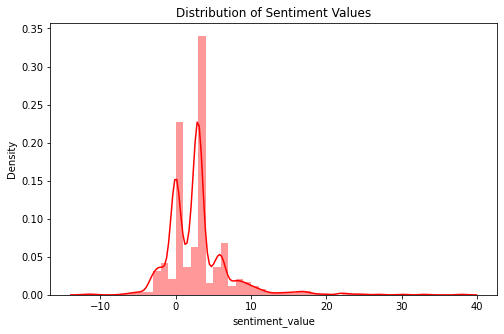

In [46]:
plt.figure(figsize=(8,5))
sns.distplot(df3['sentiment_value'],color='red')
plt.title('Distribution of Sentiment Values')
plt.show()

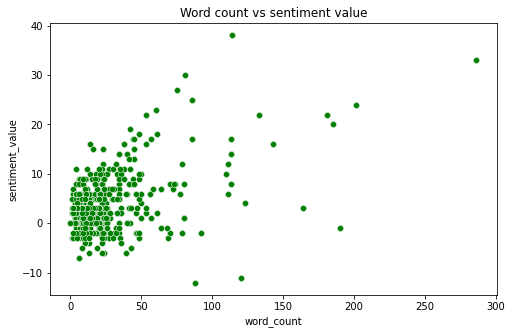

In [47]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='word_count',y='sentiment_value',data=df3,color='green')
plt.title('Word count vs sentiment value')
plt.show()

In [48]:
#creating target feature:
df3['target'] = df3['sentiments'].replace({'Negative': -1,'Neutral' : 0,'Positive':1})
df3

,index,reviews,processed_reviews,polarity,sentiments,word_count,sentiment_value,target
0,0,\nI ordered this phone 1 year ago... Overll al...,order phone year ago overl averag phone budget...,0.250,Positive,21,1,1
1,1,\nPros:1. Good battery life.2. Good design.3. ...,pro good batteri life good design amol screen ...,0.675,Positive,25,10,1
2,2,\nBahut accha phone hai muje bahut accha laga😊...,bahut accha phone hai muje bahut accha laga,0.000,Neutral,8,0,0
3,3,\nNice\n,nice,0.600,Positive,1,3,1
4,4,\nGreat\n,great,0.800,Positive,1,3,1
...,...,...,...,...,...,...,...,...
15639,16039,\nदाम के बराबर माल अछ्छा है\n,,0.000,Neutral,0,0,0
15640,16040,\nNice battery 🔋\n,nice batteri,0.600,Positive,2,3,1
15641,16041,\nCamera is not good at all..\n,camera good,0.700,Positive,2,3,1
15642,16042,\nPoor sound quality and disappointed with the...,poor sound qualiti disappoint batteri life dis...,-0.133,Negative,22,-6,-1


### 1) Bag of words:

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df3['processed_reviews']).toarray()
y = df3['target']

In [50]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [51]:
y

0        1
1        1
2        0
3        1
4        1
        ..
15639    0
15640    1
15641    1
15642   -1
15643   -1
Name: target, Length: 15644, dtype: int64

In [52]:
cv.vocabulary_    #index number/ feature number

{'order': 1371,
 'phone': 1458,
 'year': 2184,
 'ago': 51,
 'overl': 1388,
 'averag': 134,
 'budget': 262,
 'friendli': 747,
 'biggest': 215,
 'issu': 989,
 'batteri': 180,
 'drainag': 571,
 'camera': 290,
 'qualiti': 1574,
 'ok': 1342,
 'youtub': 2190,
 'hang': 846,
 'recent': 1619,
 'updat': 2042,
 'pro': 1528,
 'good': 795,
 'life': 1107,
 'design': 501,
 'amol': 74,
 'screen': 1735,
 'truli': 2010,
 'con': 397,
 'month': 1248,
 'usag': 2051,
 'app': 97,
 'crash': 441,
 'quit': 1584,
 'often': 1339,
 'also': 65,
 'get': 777,
 'stuck': 1896,
 'sometim': 1847,
 'overal': 1386,
 'nice': 1306,
 'purchas': 1566,
 'bahut': 163,
 'accha': 15,
 'hai': 834,
 'muje': 1265,
 'laga': 1071,
 'great': 822,
 'everyth': 639,
 'excel': 645,
 'except': 647,
 'nm': 1312,
 'base': 172,
 'processor': 1537,
 'back': 153,
 'polycarbon': 1491,
 'scratch': 1734,
 'easili': 590,
 'use': 2055,
 'hard': 851,
 'case': 308,
 'consid': 405,
 'processorcamera': 1538,
 'charg': 332,
 'speed': 1866,
 'take': 1941,
 

In [54]:
len(cv.vocabulary_)

2194

In [55]:
#document term matrix:
df4 = pd.DataFrame(X.transpose(),cv.get_feature_names())
df4

,0,1,2,3,4,5,6,7,8,9,...,15634,15635,15636,15637,15638,15639,15640,15641,15642,15643
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aap,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aata,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaya,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aayog,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yourespons,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
youtub,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2) Tfidf vectorizer:

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()
X2 = tv.fit_transform(df3['processed_reviews']).toarray()
y2 = df3['target']

In [57]:
X2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [58]:
tv.vocabulary_     #index number/ feature number

{'order': 1371,
 'phone': 1458,
 'year': 2184,
 'ago': 51,
 'overl': 1388,
 'averag': 134,
 'budget': 262,
 'friendli': 747,
 'biggest': 215,
 'issu': 989,
 'batteri': 180,
 'drainag': 571,
 'camera': 290,
 'qualiti': 1574,
 'ok': 1342,
 'youtub': 2190,
 'hang': 846,
 'recent': 1619,
 'updat': 2042,
 'pro': 1528,
 'good': 795,
 'life': 1107,
 'design': 501,
 'amol': 74,
 'screen': 1735,
 'truli': 2010,
 'con': 397,
 'month': 1248,
 'usag': 2051,
 'app': 97,
 'crash': 441,
 'quit': 1584,
 'often': 1339,
 'also': 65,
 'get': 777,
 'stuck': 1896,
 'sometim': 1847,
 'overal': 1386,
 'nice': 1306,
 'purchas': 1566,
 'bahut': 163,
 'accha': 15,
 'hai': 834,
 'muje': 1265,
 'laga': 1071,
 'great': 822,
 'everyth': 639,
 'excel': 645,
 'except': 647,
 'nm': 1312,
 'base': 172,
 'processor': 1537,
 'back': 153,
 'polycarbon': 1491,
 'scratch': 1734,
 'easili': 590,
 'use': 2055,
 'hard': 851,
 'case': 308,
 'consid': 405,
 'processorcamera': 1538,
 'charg': 332,
 'speed': 1866,
 'take': 1941,
 

In [59]:
len(tv.vocabulary_)

2194

In [60]:
#document term matrix:
df5 = pd.DataFrame(X2.transpose(),tv.get_feature_names())
df5

,0,1,2,3,4,5,6,7,8,9,...,15634,15635,15636,15637,15638,15639,15640,15641,15642,15643
aa,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aap,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aata,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaya,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aayog,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yourespons,0.000000,0.0,0.0,0.0,0.0,0.133806,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
youtub,0.202052,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yr,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yt,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Building

In [61]:
#Splitting for train and test data
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size=0.2,random_state=12)

In [62]:
X_train.shape ,y_train.shape   #training data

((12515, 2194), (12515,))

In [63]:
X_test.shape, y_test.shape     #testing data

((3129, 2194), (3129,))

In [64]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

## Model Training:

### 1) Logistic Regression :

In [65]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=12)

In [66]:
lr_model = lr_model.fit(X_train,y_train)
y_pred_lr = lr_model.predict(X_test)
y_pred_lr

array([1, 1, 1, ..., 1, 1, 1])

In [67]:
lr_accuracy_test =accuracy_score(y_test,y_pred_lr)  #testing accuracy
lr_accuracy_test

0.9990412272291467

In [68]:
y_pred_lr_train = lr_model.predict(X_train)    #predicting train data
lr_accuracy_train = accuracy_score(y_train,y_pred_lr_train)
lr_accuracy_train                                 #training accuracy

0.9986416300439472

In [70]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       288
           0       1.00      1.00      1.00       653
           1       1.00      1.00      1.00      2188

    accuracy                           1.00      3129
   macro avg       1.00      1.00      1.00      3129
weighted avg       1.00      1.00      1.00      3129



### 2) Decision Tree :

In [71]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=12)

In [72]:
dt_model = dt_model.fit(X_train,y_train)
y_pred_dt = dt_model.predict(X_test)
y_pred_dt

array([1, 1, 1, ..., 1, 1, 1])

In [73]:
dt_accuracy = accuracy_score(y_test,y_pred_dt)
dt_accuracy

1.0

In [74]:
y_pred_dt_train = dt_model.predict(X_train)    #predicting train data
dt_accuracy_train = accuracy_score(y_train,y_pred_dt_train)
dt_accuracy_train                                 #training accuracy

1.0

In [75]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       288
           0       1.00      1.00      1.00       653
           1       1.00      1.00      1.00      2188

    accuracy                           1.00      3129
   macro avg       1.00      1.00      1.00      3129
weighted avg       1.00      1.00      1.00      3129



### 3) Random Forest : 

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=12)

In [77]:
rf_model = rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([1, 1, 1, ..., 1, 1, 1])

In [78]:
rf_accuracy = accuracy_score(y_test,y_pred_rf)
rf_accuracy

1.0

In [79]:
y_pred_rf_train = rf_model.predict(X_train)    #predicting train data
rf_accuracy_train = accuracy_score(y_train,y_pred_rf_train)
rf_accuracy_train                               #training accuracy

1.0

In [80]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       288
           0       1.00      1.00      1.00       653
           1       1.00      1.00      1.00      2188

    accuracy                           1.00      3129
   macro avg       1.00      1.00      1.00      3129
weighted avg       1.00      1.00      1.00      3129



### 4) Naive Bayes :

In [81]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()

In [82]:
nb_model = nb_model.fit(X_train,y_train)
y_pred_nb = nb_model.predict(X_test)
y_pred_nb

array([1, 1, 1, ..., 1, 1, 1])

In [83]:
nb_accuracy = accuracy_score(y_test,y_pred_nb)
nb_accuracy

0.9162671780121444

In [84]:
y_pred_nb_train = nb_model.predict(X_train)    #predicting train data
nb_accuracy_train = accuracy_score(y_train,y_pred_nb_train)
nb_accuracy_train                             #training accuracy

0.9176987614862165

In [85]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

          -1       0.98      0.68      0.80       288
           0       0.99      0.75      0.86       653
           1       0.90      1.00      0.94      2188

    accuracy                           0.92      3129
   macro avg       0.95      0.81      0.87      3129
weighted avg       0.92      0.92      0.91      3129



### 5) Support Vector Machine :

In [86]:
from sklearn.svm import SVC
svm_model =SVC(random_state=12)

In [87]:
svm_model = svm_model.fit(X_train,y_train)
y_pred_svm = svm_model.predict(X_test)
y_pred_svm

array([1, 1, 1, ..., 1, 1, 1])

In [88]:
svm_accuracy = accuracy_score(y_test,y_pred_svm)
svm_accuracy

1.0

In [89]:
y_pred_svm_train = svm_model.predict(X_train)    #predicting train data
svm_accuracy_train = accuracy_score(y_train,y_pred_svm_train)
svm_accuracy_train                             #training accuracy

1.0

In [90]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       288
           0       1.00      1.00      1.00       653
           1       1.00      1.00      1.00      2188

    accuracy                           1.00      3129
   macro avg       1.00      1.00      1.00      3129
weighted avg       1.00      1.00      1.00      3129



### 6) Adaptive Boosting :

In [91]:
from sklearn.ensemble import AdaBoostClassifier
ab_model = AdaBoostClassifier(random_state=12)

In [92]:
ab_model =ab_model.fit(X_train,y_train)
y_pred_ab = ab_model.predict(X_test)
y_pred_ab

array([1, 1, 1, ..., 0, 1, 1])

In [93]:
ab_accuracy = accuracy_score(y_test,y_pred_ab)
ab_accuracy

0.8922978587408118

In [94]:
y_pred_ab_train = ab_model.predict(X_train)    #predicting train data
ab_accuracy_train = accuracy_score(y_train,y_pred_ab_train)
ab_accuracy_train                             #training accuracy

0.8846983619656412

In [95]:
#Comapring with different model Accuracies:
accuracy_dict = {'Models':['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','Support Vector Machine','Adaptive Boosting'],
                 'Test_data_Accuracy_scores': [lr_accuracy_test,dt_accuracy,rf_accuracy,nb_accuracy,svm_accuracy,ab_accuracy],
                'Train_data_Accuracy_scores': [lr_accuracy_train,dt_accuracy_train,rf_accuracy_train,nb_accuracy_train,svm_accuracy_train,ab_accuracy_train]}
df_acc_scr = pd.DataFrame(accuracy_dict)
df_acc_scr

,Models,Test_data_Accuracy_scores,Train_data_Accuracy_scores
0,Logistic Regression,0.999041,0.998642
1,Decision Tree,1.000000,1.000000
2,Random Forest,1.000000,1.000000
3,Naive Bayes,0.916267,0.917699
4,Support Vector Machine,1.000000,1.000000
5,Adaptive Boosting,0.892298,0.884698


In [96]:
import pickle

In [97]:
file_name = open('rf_model.sav','wb')
pickle.dump(rf_model,file_name)

In [98]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 84.4 MB/s eta 0:00:00
